In [75]:
# objective: analyze data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare

In [76]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [77]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [78]:
# load data, csv files
mouse_drug_data = 'mouse_drug_data.csv'

# reference path to csv
csv_path_1 = 'mouse_drug_data.csv'

# import the csv files as a dataframes
mouse_df = pd.read_csv(csv_path_1, encoding="utf-8")

# look at data frame
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [79]:
# load data, csv files
clinic_trial_data = 'clinicaltrial_data.csv'

# reference path to csv
csv_path_2 = "clinicaltrial_data.csv"

# import the csv files as a dataframes
clinic_df = pd.read_csv(csv_path_2, encoding="utf-8")

# look at data frame
clinic_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [80]:
# combine the data into a single dataset
# outer join keeps all data (inner would lose any data that is not in both frames)
trial_df = pd.merge(mouse_df, clinic_df, on="Mouse ID", how="outer")

# look at merged data frame
trial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [81]:
# store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped1_df = trial_df.groupby(["Drug","Timepoint"])['Tumor Volume (mm3)']
tumor_response = grouped1_df.mean()

# convert to DataFrame
tumor_response = tumor_response.reset_index()

# preview DataFrame
tumor_response.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [82]:
# store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_standard_errors = grouped1_df.sem()

# convert to DataFrame
tumor_standard_errors_df = pd.DataFrame(tumor_standard_errors)

# preview DataFrame
tumor_standard_errors_df.reset_index(inplace=True)
tumor_standard_errors_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [83]:
# Minor Data Munging to Re-Format the Data Frames
pivot_tumor_response = tumor_response.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# view
pivot_tumor_response.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


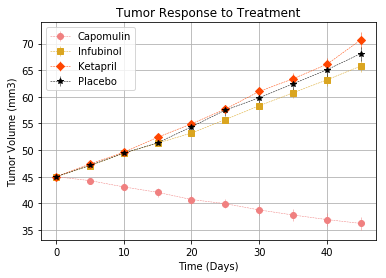

In [84]:
# Generate the Plot (with Error Bars)
drug_list = [('Capomulin','o','lightcoral'),('Infubinol','s','goldenrod'),
             ('Ketapril','D','orangered'),('Placebo','*','black')]

for drug,marker,colors in drug_list:
    ste = tumor_standard_errors[drug]
    tumor_treatment_plt = plt.errorbar(pivot_tumor_response.index,pivot_tumor_response[drug],ste,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)
plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

# save the fig
plt.savefig('tumor-response-treatment.pdf')

plt.grid()

## Metastatic Response to Treatment

In [85]:
# store the mean met. site data Grouped by drug and timepoint 
grouped2_df = trial_df.groupby(["Drug","Timepoint"])['Metastatic Sites']
meta_response = grouped2_df.mean()

# convert to DataFrame
meta_response = meta_response.reset_index()

# preview DataFrame
meta_response.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [86]:
# store the mean met. site data Grouped by drug and timepoint 
meta_standard_errors = grouped2_df.sem()

# convert to DataFrame
meta_standard_errors_df = pd.DataFrame(meta_standard_errors)

# preview DataFrame
meta_standard_errors_df.reset_index(inplace=True)
meta_standard_errors_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [87]:
# Minor Data Munging to Re-Format the Data Frames
pivot_meta_response = meta_response.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# view
pivot_meta_response.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


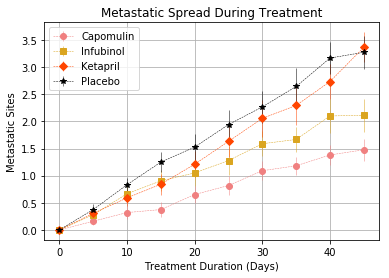

In [88]:
# Generate the Plot (with Error Bars)
drug_list = [('Capomulin','o','lightcoral'),('Infubinol','s','goldenrod'),
             ('Ketapril','D','orangered'),('Placebo','*','black')]

for drug,marker,colors in drug_list:
    mste = meta_standard_errors[drug]
    meta_treatment_plt = plt.errorbar(pivot_meta_response.index,pivot_meta_response[drug],mste,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)
plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')

# save the fig
plt.savefig('meta-spread-treatment.pdf')

plt.grid()

## Survival Rates

In [89]:
# store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped3_df = trial_df.groupby(['Drug','Timepoint'])['Mouse ID']
mice_count_df = grouped3_df.nunique()
mice_count_df = pd.DataFrame(mice_count_df)

# convert to DataFrame
mice_count_df.reset_index(inplace=True)
mice_count_df = mice_count_df.rename(columns={'Mouse ID':'Mouse Count'})

# preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [90]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mice_count = mice_count_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# view
pivot_mice_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


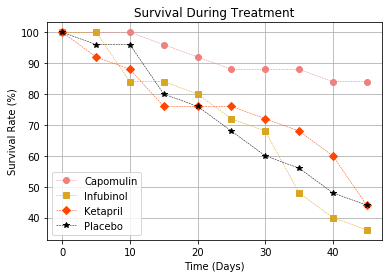

In [91]:
# Generate the Plot (Accounting for percentages)

drug_list = [('Capomulin','o','lightcoral'),('Infubinol','s','goldenrod'),
             ('Ketapril','D','orangered'),('Placebo','*','black')]

for drug,marker,colors in drug_list:
    mice_total = pivot_mice_count[drug][0]
    survival_rate = (pivot_mice_count[drug]/mice_total)*100
    survival_treatment_plt = plt.plot(pivot_mice_count.index,survival_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5)  
    
plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')

# save the fig
plt.savefig('survival_rate.pdf')

plt.grid()

## Summary Bar Graph

In [92]:
# Calculate the percent changes for each drug
# this calculation: [(the final size / the starting size)-1]*100
# [-1] refers to last row
# [ ,-1] would refer to last column
# [0] refers to first row
tumor_change = (pivot_tumor_response.iloc[-1]/(pivot_tumor_response.iloc[0])-1)*100

tumor_change.head(10)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [93]:
# convert to DataFrame
tumor_change_df = pd.DataFrame(tumor_change)

# preview DataFrame
#meta_standard_errors_df.reset_index(inplace=True)
tumor_change_df.head(10)

tumor_change_df = tumor_change_df.rename(columns={'0':'Percent'})
tumor_change_df.head(10)

,0
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [94]:
# Store all Relevant Percent Changes into a dictionary

tumor_dict = dict(tumor_change)
tumor_dict

{'Capomulin': -19.47530266789417,
 'Ceftamin': 42.516491855897456,
 'Infubinol': 46.12347172785187,
 'Ketapril': 57.02879468660606,
 'Naftisol': 53.92334713476923,
 'Placebo': 51.29796048315151,
 'Propriva': 47.24117486320636,
 'Ramicane': -22.32090046276667,
 'Stelasyn': 52.085134287899024,
 'Zoniferol': 46.57975086509525}

In [95]:
# Store all Relevant Percent Changes into a Tuple

tumor_tuple = tuple(tumor_change)
tumor_tuple

(-19.47530266789417,
 42.516491855897456,
 46.12347172785187,
 57.02879468660606,
 53.92334713476923,
 51.29796048315151,
 47.24117486320636,
 -22.32090046276667,
 52.085134287899024,
 46.57975086509525)

In [96]:
# Splice the data between passing and failing drugs
drug_success = tumor_change_df < 0
drug_success.head

<bound method NDFrame.head of                0
Drug            
Capomulin   True
Ceftamin   False
Infubinol  False
Ketapril   False
Naftisol   False
Placebo    False
Propriva   False
Ramicane    True
Stelasyn   False
Zoniferol  False>

In [97]:
# label each bar with height value
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        
        # Just print the percentage in the center of the bar
        label_position = height/2

        ax.text(rect.get_x() + rect.get_width()/2., label_position,str('%d' % int(height)) + '%',
                ha='center', va='bottom', color = 'w', size = 14)

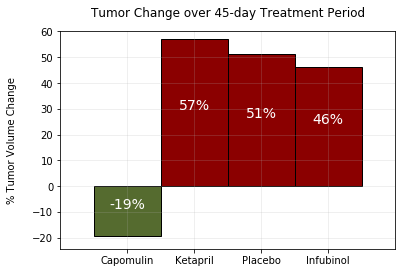

In [98]:
# create our axis variable
fig, ax = plt.subplots()

# define our bar chart 
x_axis = np.arange(0,4,1)
barwidth = 0.5 
heights = [tumor_change["Capomulin"], tumor_change["Ketapril"], tumor_change["Placebo"], tumor_change["Infubinol"]]
labels = ["Capomulin", "Ketapril", "Placebo", "Infubinol"]
colors = []

# if the change in volume is positive, assign the color red, else green
for vols in heights:
    if vols >= 0:
        colors.append('darkred')
    else:
        colors.append('darkolivegreen')

barplot = ax.bar(x_axis, heights, width = 1, align='center', color = colors,
                 edgecolor = 'black', linewidth = 1, tick_label = labels)

# fornat labels
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change over 45-day Treatment Period")

# Add Gridlines
ax.grid(alpha = 0.25)

# set limits of x axis (inlcude left/ right whitespace)
ax.set_xlim(-1.0, len(x_axis))

# set limits of y axis (include top/bottom whitespace)
ax.set_ylim(min(tumor_change) - 2, max(tumor_change) + 3)

# padding below/left of the ticks in the axes
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.title.set_position([.5, 1.04])

# Add labels for the percentages
autolabel(barplot, ax)

# save the fig
plt.savefig('drug_success.pdf')

plt.show()